
### What is Automatic Differentiation (Autograd)?

Automatic Differentiation (Autograd) is a technique to compute **exact derivatives** of functions expressed as computer programs. It decomposes the function into a sequence of elementary operations (addition, multiplication, etc.), constructs a computational graph, and applies the **chain rule** to compute gradients. Unlike numerical/symbolic differentiation, autograd efficiently handles high-dimensional inputs and complex functions.

### Why is Autograd Crucial in Deep Learning?

- **Efficiency**: Deep learning models often have millions of parameters. Autograd computes gradients in \(O(n)\) time (\(n\) = number of operations), making optimization feasible.
- **Flexibility**: Allows dynamic computation graphs (PyTorch), essential for models like RNNs.
- **Precision**: Provides exact gradients, unlike numerical approximations.

### Comparison with Other Methods

| **Method**              | **Pros**                             | **Cons**                               |
| ----------------------- | ------------------------------------ | -------------------------------------- |
| **Numerical**           | Simple to implement                  | Prone to errors; \(O(n)\) complexity   |
| **Symbolic**            | Exact expressions                    | Expression swell; not runtime friendly |
| **Automatic (Reverse)** | Exact gradients; \(O(n)\) complexity | Requires tracking computations         |

---

## Mathematical Foundations

### Chain Rule & Computational Graphs

Autograd uses **reverse-mode differentiation** (backpropagation). For a function \(y = f(g(x))\):

$$
\frac{dy}{dx} = \frac{dy}{dg} \cdot \frac{dg}{dx}
$$

A computational graph tracks operations during the forward pass. During the backward pass, gradients are computed from output to inputs.

### Reverse-Mode Differentiation Example

$
Consider (z = x \cdot y + \sin(x)):
$

1. **Forward Pass**:
  

   - a = x ⋅ y
   - b = sin(x)
   - z = a + b


2. **Backward Pass**:
   $
    (\frac{\partial z}{\partial a} = 1)
    (\frac{\partial z}{\partial b} = 1)
    (\frac{\partial a}{\partial x} = y), (\frac{\partial a}{\partial y} = x)
    (\frac{\partial b}{\partial x} = \cos(x))
   $
   - Gradients:
     $$
     \frac{\partial z}{\partial x} = \frac{\partial z}{\partial a} \cdot \frac{\partial a}{\partial x} + \frac{\partial z}{\partial b} \cdot \frac{\partial b}{\partial x} = y + \cos(x)
     $$
     $$
     \frac{\partial z}{\partial y} = x
     $$

### Computational Complexity

- **Reverse-Mode**: \(O(n)\) operations, where \(n\) is the number of forward operations. Ideal for functions with many inputs and few outputs (e.g., loss functions).

---

## Technical Implementation

### Dynamic Computation Graph in PyTorch

- **Tensor Tracking**: When `requires_grad=True`, operations on tensors are tracked in a graph.
- **Function Nodes**: Each operation generates a `grad_fn` attribute, referencing the backward formula.
- **Backward Pass**: Calling `.backward()` traverses the graph in reverse, computing gradients via chain rule.

### Key Classes & Methods

1. **`torch.Tensor`**:
   - `requires_grad`: Enables gradient tracking.
   - `grad`: Stores accumulated gradients (None for non-leaf tensors).
   - `grad_fn`: References the `Function` that created the tensor.
2. **`backward()`**:
   - Computes gradients and populates `.grad` for leaf tensors.
   - Use `retain_graph=True` to prevent graph deletion.
3. **Gradient Accumulation**:
   - Gradients are **accumulated**; reset with `.zero_()`.

---

## Practical Code Demonstrations

### Basic Autograd Example

```python
import torch

x = torch.tensor(2.0, requires_grad=True)
y = x ** 2 + 3 * x + 1
y.backward()
print(x.grad)  # dy/dx = 2x + 3 = 7.0
```

### Custom Autograd Function

```python
class MyReLU(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return x.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        x, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[x < 0] = 0
        return grad_input

x = torch.randn(3, requires_grad=True)
y = MyReLU.apply(x)
y.backward(torch.ones(3))
```

### Gradient Manipulation

```python
# Gradient Clipping
x.grad.data.clamp_(-1, 1)

# Gradient Hooks
def print_grad(grad):
    print("Gradient:", grad)
x.register_hook(print_grad)
```

### Stopping Gradient Computation

```python
with torch.no_grad():
    inference = model(input)  # No gradient tracking

x_detached = x.detach()  # Removes from computation graph
```

---

## Comparative Analysis

| **Framework** | **Graph Type** | **API**           | **Performance**      |
| ------------- | -------------- | ----------------- | -------------------- |
| PyTorch       | Dynamic        | Imperative        | Fast, flexible       |
| TensorFlow    | Static/Eager   | Declarative/Eager | Optimized with XLA   |
| JAX           | Static         | Functional        | XLA-accelerated, JIT |

**Benchmark**: JAX often outperforms in compiled code, but PyTorch excels in dynamic scenarios.

---




In [1]:
def dy_dx(x):
  return 2*x

In [2]:
dy_dx(3)

6

In [3]:
import torch

In [14]:
x = torch.tensor(3.0, requires_grad=True)  # scalar

In [15]:
y = x**2

In [6]:
x

tensor(3., requires_grad=True)

In [7]:
y

tensor(9., grad_fn=<PowBackward0>)

In [8]:
y.backward()

In [9]:
x.grad

tensor(6.)

In [10]:
import math

def dz_dx(x):
    return 2 * x * math.cos(x**2)

In [11]:
dz_dx(4)

-7.661275842587077

In [20]:
x = torch.tensor(4.0, requires_grad=True)

In [21]:
y = x ** 2

In [22]:
z = torch.sin(y)

In [23]:
x

tensor(4., requires_grad=True)

In [24]:
y

tensor(16., grad_fn=<PowBackward0>)

In [25]:
z

tensor(-0.2879, grad_fn=<SinBackward0>)

In [26]:
z.backward()

In [27]:
x.grad

tensor(-7.6613)

In [28]:
y.grad

<ipython-input-28-10b3a7061f6d>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


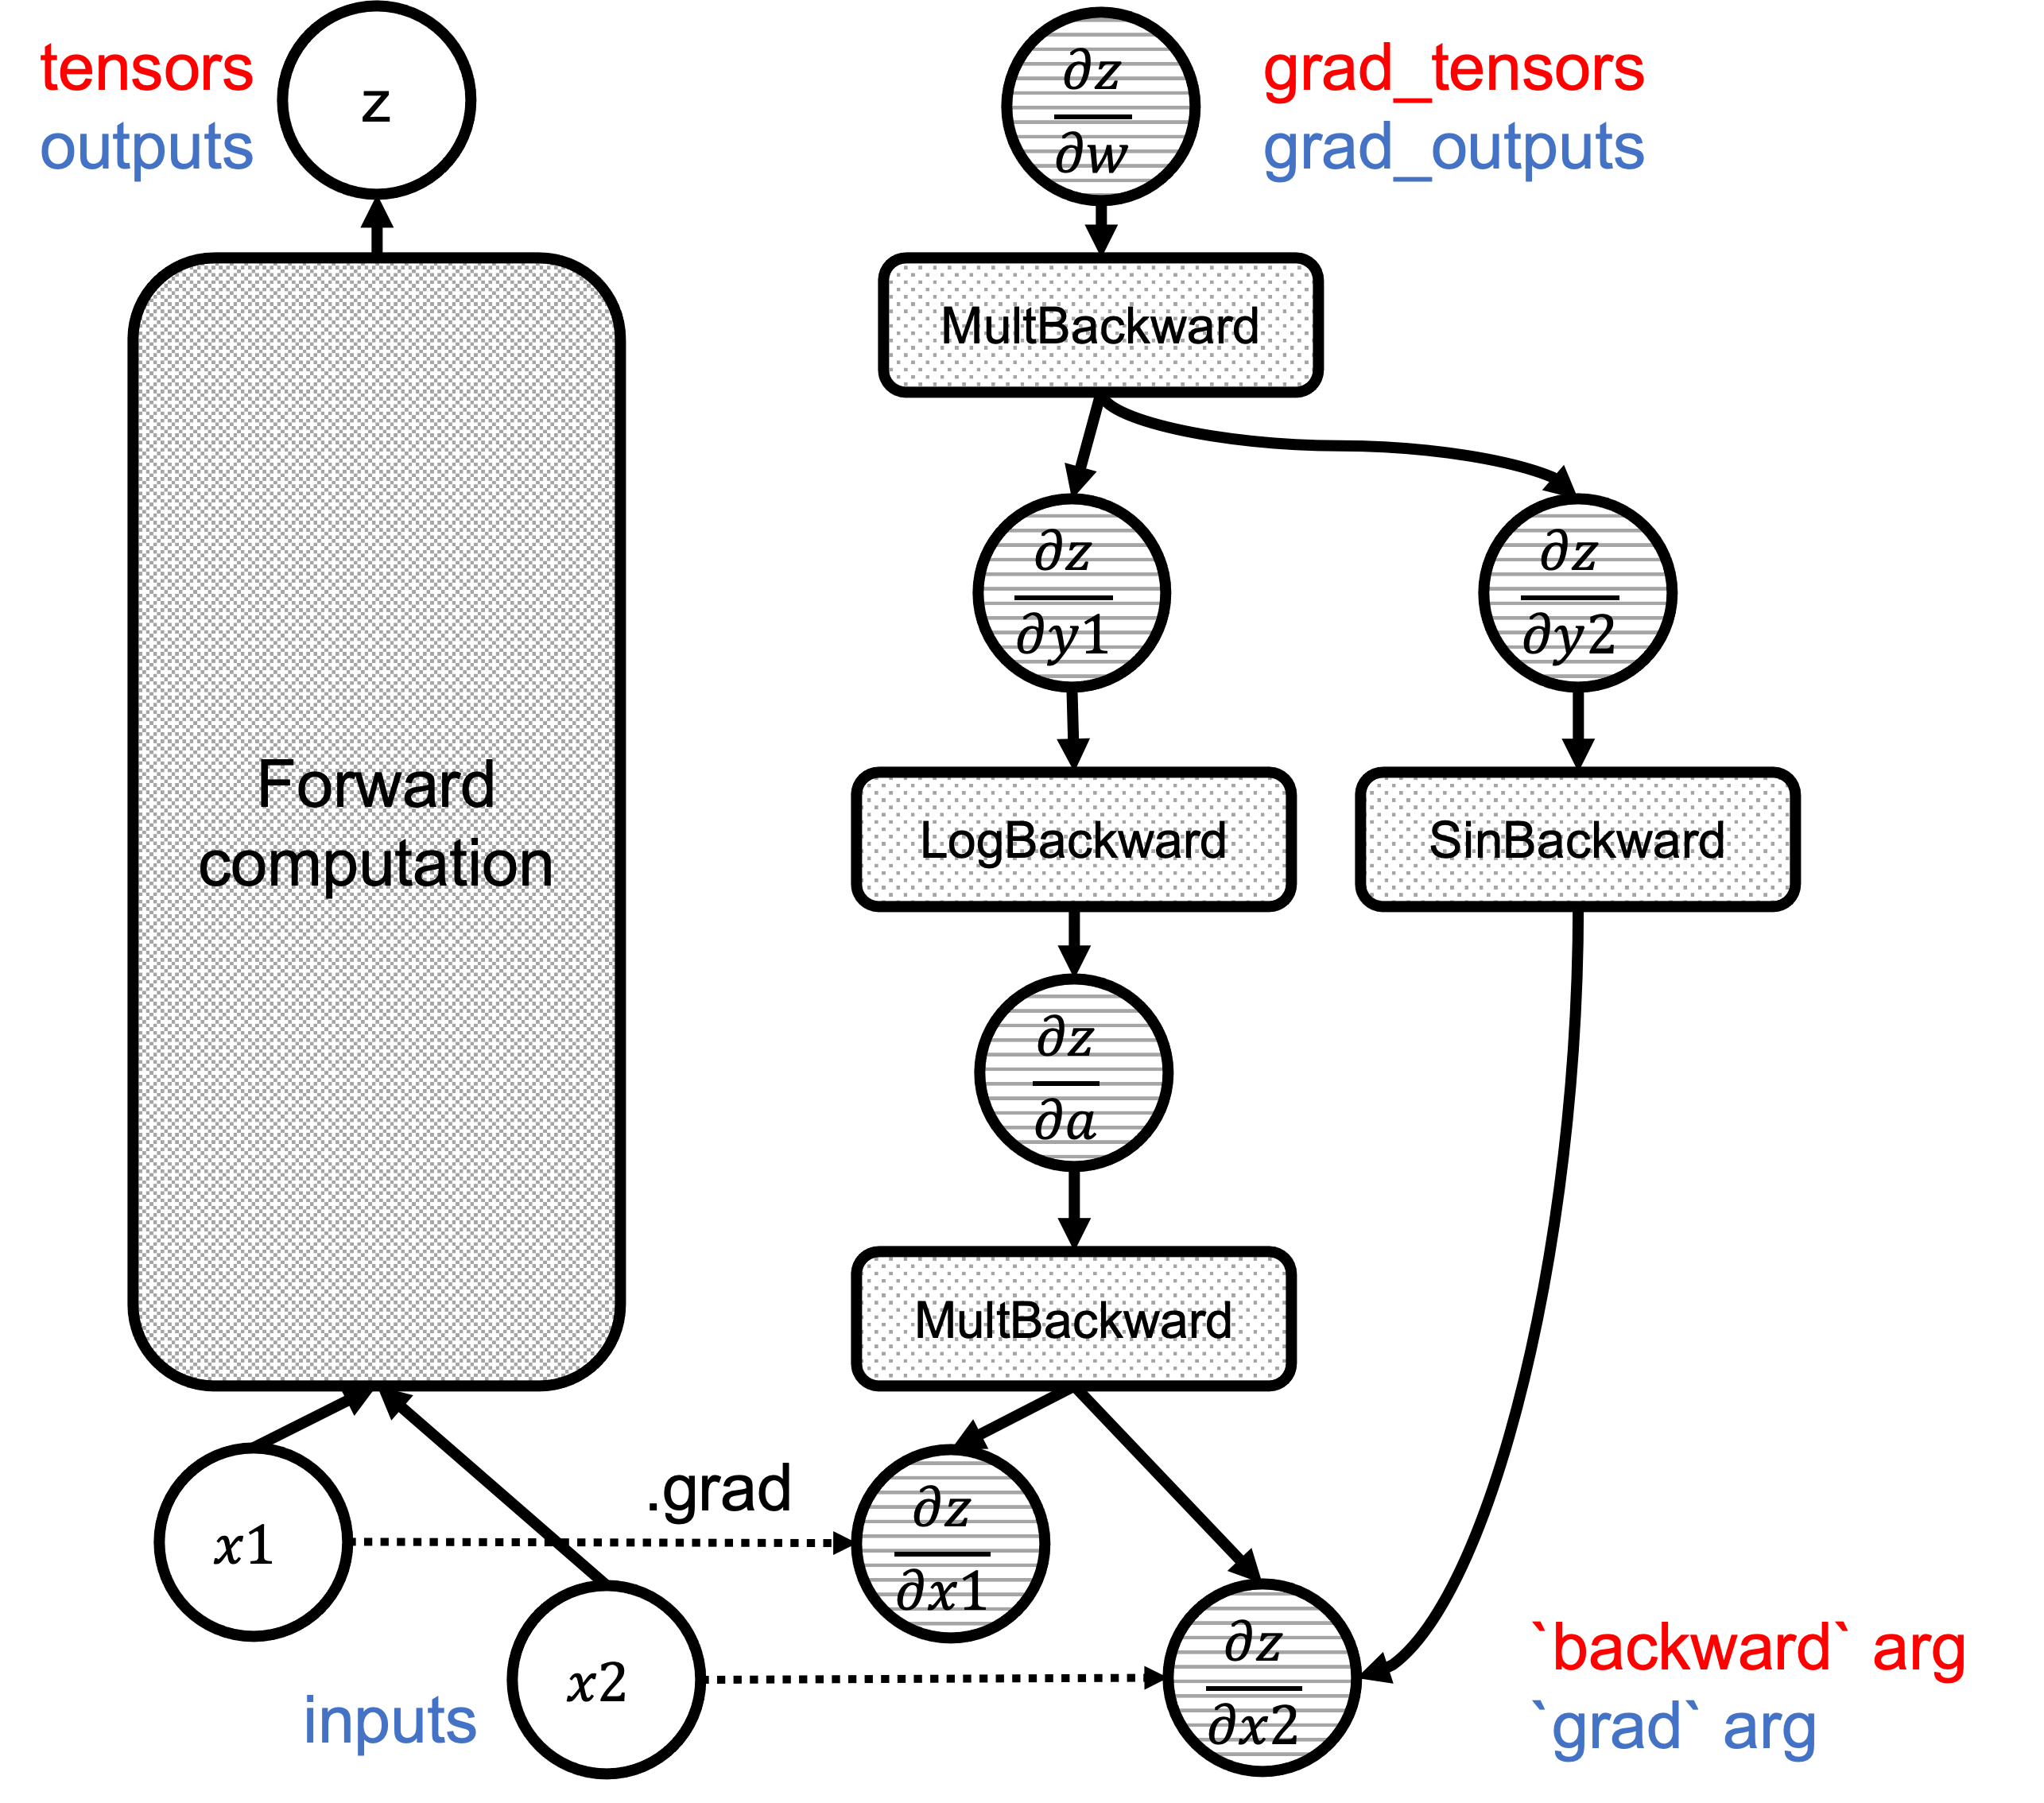

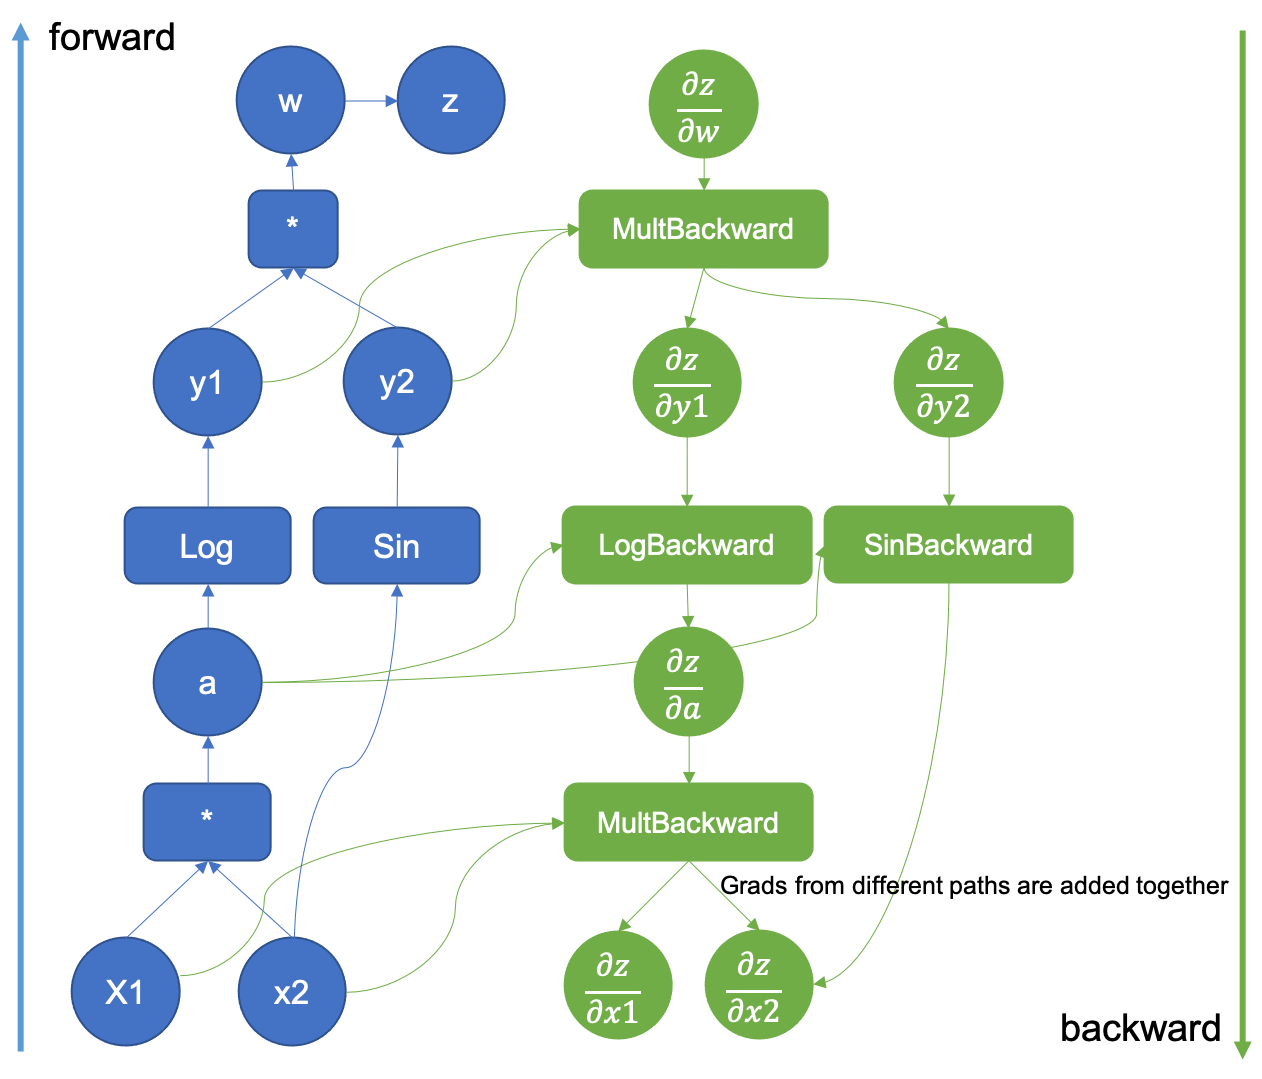

### neural network

In [29]:
import torch

# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

In [30]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
    epsilon = 1e-8  # To prevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [31]:
# Forward pass
z = w * x + b  # Weighted sum (linear part)
y_pred = torch.sigmoid(z)  # Predicted probability

# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)

In [32]:
loss

tensor(6.7012)

In [33]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [34]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


## now calculating gradients using autograd

In [35]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

In [37]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [38]:
w

tensor(1., requires_grad=True)

In [39]:
b

tensor(0., requires_grad=True)

In [40]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [41]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [42]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [43]:
loss.backward()

In [44]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


In [63]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)  # vector

In [64]:
x

tensor([1., 2., 3.], requires_grad=True)

In [65]:
y = (x**2).mean()
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [66]:
y.backward()

In [75]:
x.grad

tensor(8.)

In [81]:
# clearing grad
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [82]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [83]:
y.backward()

In [84]:
x.grad

tensor(4.)

In [85]:
x.grad.zero_()  # used for clearing gradients

tensor(0.)

In [90]:
# disable gradient tracking
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [91]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [92]:
y.backward()

In [93]:
x.grad

tensor(4.)

In [94]:
# option 1 - requires_grad_(False)
# option 2 - detach()
# option 3 - torch.no_grad()

In [95]:
x.requires_grad_(False)

tensor(2.)

In [96]:
x

tensor(2.)

In [99]:
y = x ** 2

In [100]:
y

tensor(4.)

In [101]:
y.backward()  # we get error because we set requires_grad_ to false ..and now we are not tracking gradients...

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [102]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [106]:
z = x.detach()
z

tensor(2.)

In [107]:
y = x ** 2

In [108]:
y

tensor(4., grad_fn=<PowBackward0>)

In [110]:
y1 = z ** 2
y1  # here no gradient function

tensor(4.)

In [111]:
y.backward()

In [113]:
y1.backward() # not possible because z is detach from x

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [114]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [125]:
with torch.no_grad():
    y = x ** 2


In [126]:
y

tensor(4.)

In [127]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn